...

In [99]:
import pandas as pd

In [100]:
pd.options.display.float_format = '{:.2f}'.format

...

In [101]:
df_dofinansowanie = pd.read_csv(
    'umowy_pelna_lista_krajowe.csv',
    encoding='ISO-8859-2',
    converters={'TERYT pe?ny': str},
    thousands=',')

df_dofinansowanie = df_dofinansowanie.loc[df_dofinansowanie['TERYT pe?ny'] != ''].reset_index(drop=True)

df_dofinansowanie['Dofinansowanie UE (PLN)'] = \
    df_dofinansowanie['Dofinansowanie UE (PLN)'].apply(pd.to_numeric)

df_dofinansowanie['Data rozpocz?cia realizacji'] = pd.to_datetime(df_dofinansowanie['Data rozpocz?cia realizacji'])
df_dofinansowanie['Rok rozpocz?cia realizacji'] = df_dofinansowanie['Data rozpocz?cia realizacji'].dt.year

df_dofinansowanie['Data podpisania umowy pierwotnej'] = pd.to_datetime(df_dofinansowanie['Data podpisania umowy pierwotnej'])
df_dofinansowanie['Rok podpisania umowy pierwotnej'] = df_dofinansowanie['Data podpisania umowy pierwotnej'].dt.year

C:\Users\micha\AppData\Local\Temp\ipykernel_28456\3760256257.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_dofinansowanie = pd.read_csv(


In [102]:
df_dofinansowanie_agg = df_dofinansowanie \
    .groupby(['TERYT pe?ny', 'Rok rozpocz?cia realizacji'])['Dofinansowanie UE (PLN)'].sum().reset_index()
df_dofinansowanie_agg = df_dofinansowanie_agg \
    .rename(columns={'TERYT pe?ny': 'Kod', 'Rok rozpocz?cia realizacji': 'Rok', 'Dofinansowanie UE (PLN)': 'Suma'})
df_dofinansowanie_agg = df_dofinansowanie_agg \
    .loc[df_dofinansowanie_agg['Kod'].str.len() == 7].reset_index(drop=True)

...

In [103]:
df_podz = pd.read_csv(
    'PODZ_1410_CREL.csv',
    sep=';',
    converters={'Kod': str})
df_podz = df_podz[['Kod', 'Rok', 'Wartosc']]
df_podz = df_podz.loc[df_podz['Kod'].str.endswith(('1', '2', '3'))]
df_podz = df_podz.dropna()
df_podz = df_podz.rename(columns={
    'Wartosc': 'Powierzchnia'})

In [104]:
df_wyna = pd.read_csv(
    'WYNA_2497_CREL.csv',
    sep=';',
    converters={'Kod': str},
    decimal=',')
df_wyna = df_wyna[['Kod', 'Wyszczególnienie', 'Rok', 'Wartosc']]
df_wyna = df_wyna.dropna()
df_wyna = df_wyna.pivot_table(index=['Kod', 'Rok'], columns='Wyszczególnienie', values='Wartosc').reset_index()
df_wyna = df_wyna.rename(columns={
    'ogółem': 'Wynagrodzenie_ogolem',
    'przeciętne miesięczne wynagrodzenia brutto w relacji do średniej krajowej (Polska=100)': 'Wynagrodzenie_w_relacji_do_sredniej'})

In [105]:
df_fina_1 = pd.read_csv(
    'FINA_2622_CREL_1.csv',
    sep=';',
    converters={'Kod': str},
    decimal=',')
df_fina_1 = df_fina_1[['Kod', 'Rodzaje dochodów', 'Rok', 'Wartosc']]
df_fina_1 = df_fina_1.dropna()
df_fina_1 = df_fina_1.pivot_table(index=['Kod', 'Rok'], columns='Rodzaje dochodów', values='Wartosc').reset_index()
df_fina_1 = df_fina_1.rename(columns={
    'dochody podatkowe - podatek leśny': 'Dochody_podatek_lesny',
    'dochody podatkowe - podatek od czynności cywilnoprawnych': 'Dochody_podatek_PCC',
    'dochody podatkowe - podatek od działalności gospodarczej osób fizycznych, opłacany w formie karty podatkowej': 'Dochody_podatek_od_dzialalnosci_gospodarczej',
    'dochody podatkowe - podatek od nieruchomości': 'Dochody_podatek_od_nieruchomosci',
    'dochody podatkowe - podatek od spadków i darowizn': 'Dochody_podatek_od_spadkow',
    'dochody podatkowe - podatek od środków transportowych': 'Dochody_podatek_od_srodkow_transportowych',
    'dochody podatkowe - podatek rolny': 'Dochody_podatek_rolny',
    'dochody podatkowe - ustalone i pobierane na podstawie odrębnych ustaw': 'Dochody_podatek_odrebne_ustawy',
    'razem': 'Dochody_razem'})

df_fina_1

C:\Users\micha\AppData\Local\Temp\ipykernel_28456\1671418303.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_fina_1 = pd.read_csv(


Rodzaje dochodów,Kod,Rok,Dochody_podatek_lesny,Dochody_podatek_PCC,Dochody_podatek_od_dzialalnosci_gospodarczej,Dochody_podatek_od_nieruchomosci,Dochody_podatek_od_spadkow,Dochody_podatek_od_srodkow_transportowych,Dochody_podatek_rolny,Dochody_podatek_odrebne_ustawy,Dochody_razem
0,0201011,2004,NaN,549608.00,NaN,13532989.00,NaN,625159.00,23687.00,NaN,41378568.00
1,0201011,2005,NaN,609855.00,NaN,13667398.00,NaN,700134.00,26634.00,15438121.00,43417443.00
2,0201011,2006,NaN,844223.65,NaN,14633962.72,NaN,747182.64,11683.60,16647124.98,50319253.08
3,0201011,2007,NaN,1344365.01,NaN,14944781.74,NaN,777345.52,19377.36,17436387.93,62025513.24
4,0201011,2008,6799.55,1790135.40,NaN,16089534.56,NaN,836441.10,30823.60,19149551.45,80755930.93
...,...,...,...,...,...,...,...,...,...,...,...
47078,3263011,2018,154462.39,5361951.37,572868.36,108107448.79,437144.83,589658.88,51297.75,115274832.37,261780766.79
47079,3263011,2019,150329.31,6088184.20,468411.51,38527846.59,228886.23,608637.40,64855.15,46137150.39,167638796.15
47080,3263011,2020,156556.52,5125090.74,329522.12,78767466.83,552009.16,558925.68,48689.09,85538260.14,263006955.07
47081,3263011,2021,163778.36,9082482.28,492045.28,78491368.35,947992.83,602586.14,59824.46,89840077.70,252345800.93


In [106]:
df_fina_2 = pd.read_csv(
    'FINA_2622_CREL_2.csv',
    sep=';',
    converters={'Kod': str},
    decimal=',')
df_fina_2 = df_fina_2[['Kod', 'Rodzaje dochodów', 'Rok', 'Wartosc']]
df_fina_2 = df_fina_2.dropna()
df_fina_2 = df_fina_2.pivot_table(index=['Kod', 'Rok'], columns='Rodzaje dochodów', values='Wartosc').reset_index()
df_fina_2 = df_fina_2.rename(columns={
    'dochody z majątku': 'Dochody_z_majatku',
    'dochody z majątku - dochody z najmu i dzierżawy składników majątkowych JST oraz innych umów o podobnym charakterze': 'Dochody_z_najmu_i_dzierzawy',
    'pozostałe dochody - wpływy z usług': 'Dochody_z_uslug',
    'pozostałe dochody - środki na dofinansowanie własnych zadań pozyskane z innych źródeł - inwestycyjne': 'Dochody_dofinansowanie_inwestycyjne',
    'pozostałe dochody - środki na dofinansowanie własnych zadań pozyskane z innych źródeł - razem': 'Dochody_dofinansowanie_razem',
    'udziały w podatkach stanowiących dochody budżetu państwa podatek dochodowy od osób fizycznych': 'Udzialy_w_podatkach_dochodowych_od_osob_fizycznych',
    'udziały w podatkach stanowiących dochody budżetu państwa podatek dochodowy od osób prawnych': 'Udzialy_w_podatkach_dochodowych_od_osob_prywatnych',
    'udziały w podatkach stanowiących dochody budżetu państwa razem': 'Udzialy_w_podatkach_dochodowych_razem',
    'wpływy z innych lokalnych opłat pobieranych przez jednostki samorządu terytorialnego na podstawie odrębnych ustaw': 'Wplywy_z_innych_lokalnych_oplat',
    'wpływy z opłaty eksploatacyjnej': 'Wplywy_z_oplaty_eksploatacyjnej',
    'wpływy z opłaty skarbowej': 'Wplywy_z_oplaty_skarbowej',
    'wpływy z opłaty targowej': 'Wplywy_z_oplaty_targowej'})

df_fina_2

C:\Users\micha\AppData\Local\Temp\ipykernel_28456\2161929356.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_fina_2 = pd.read_csv(


Rodzaje dochodów,Kod,Rok,Dochody_z_majatku,Dochody_z_najmu_i_dzierzawy,Dochody_z_uslug,Dochody_dofinansowanie_inwestycyjne,Dochody_dofinansowanie_razem,Udzialy_w_podatkach_dochodowych_od_osob_fizycznych,Udzialy_w_podatkach_dochodowych_od_osob_prywatnych,Udzialy_w_podatkach_dochodowych_razem,Wplywy_z_innych_lokalnych_oplat,Wplywy_z_oplaty_eksploatacyjnej,Wplywy_z_oplaty_skarbowej,Wplywy_z_oplaty_targowej
0,0201011,2004,5344205.00,NaN,184307.00,NaN,519209.00,13285456.00,1065169.00,14350625.00,44200.00,NaN,1209998.00,NaN
1,0201011,2005,4560489.00,NaN,96462.00,NaN,9024183.00,15985331.00,1170863.00,17156194.00,42840.00,NaN,1282943.00,NaN
2,0201011,2006,8528727.69,NaN,231470.96,8752288.98,8864860.57,18101668.00,1048115.83,19149783.83,37365.00,NaN,1203990.73,NaN
3,0201011,2007,15042480.34,9219682.12,339654.15,18153240.30,18438743.21,21785308.00,1336702.02,23122010.02,78798.51,NaN,1228704.53,NaN
4,0201011,2008,22797881.07,9546379.31,787256.69,5046691.69,5182137.79,23974587.00,1532633.44,25507220.44,83882.94,NaN,1364245.93,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47078,3263011,2018,16419859.31,4261374.83,1996824.80,25285.92,237485.34,52799183.00,2690098.17,55489281.17,10458871.30,4684.54,434077.88,608625.90
47079,3263011,2019,8844350.07,4324758.68,2187576.47,0.00,225831.84,55319040.00,2770684.17,58089724.17,11369287.11,3456.95,415686.53,610059.50
47080,3263011,2020,13485033.97,6159923.01,1917372.55,21002107.00,21192313.05,53739656.00,3144444.38,56884100.38,12281916.71,5157.50,355201.29,507341.00
47081,3263011,2021,16928500.75,7582499.62,4110105.72,888293.63,1072910.83,63936763.00,3975531.95,67912294.95,17127683.55,27746.70,416473.03,0.00


In [107]:
df_ludn_1 = pd.read_csv(  # ogolem
    'LUDN_1342_CREL_1.csv',
    sep=';',
    converters={'Kod': str},
    decimal=',')
df_ludn_1 = df_ludn_1[['Kod', 'Wiek', 'Rok', 'Wartosc']]
df_ludn_1 = df_ludn_1.dropna()
df_ludn_1 = df_ludn_1.pivot_table(index=['Kod', 'Rok'], columns='Wiek', values='Wartosc').reset_index()
df_ludn_1 = df_ludn_1.rename(columns={
    'ogółem': 'Ludnosc_ogolem',
    'w wieku poprodukcyjnym': 'Ludnosc_w_wieku_poprodukcyjnym',
    'w wieku produkcyjnym': 'Ludnosc_w_wieku_produkcyjnym',
    'w wieku produkcyjnym mobilnym': 'Ludnosc_w_wieku_produkcyjnym_mobilnym',
    'w wieku produkcyjnym niemobilnym': 'Ludnosc_w_wieku_produkcyjnym_niemobilnym',
    'w wieku przedprodukcyjnym': 'Ludnosc_w_wieku_przedprodukcyjnym'})

df_ludn_1

Wiek,Kod,Rok,Ludnosc_ogolem,Ludnosc_w_wieku_poprodukcyjnym,Ludnosc_w_wieku_produkcyjnym,Ludnosc_w_wieku_produkcyjnym_mobilnym,Ludnosc_w_wieku_produkcyjnym_niemobilnym,Ludnosc_w_wieku_przedprodukcyjnym
0,0201011,2010,40309.00,7683.00,26085.00,15183.00,10902.00,6541.00
1,0201011,2011,40119.00,8020.00,25647.00,15047.00,10600.00,6452.00
2,0201011,2012,39851.00,8392.00,25160.00,14932.00,10228.00,6299.00
3,0201011,2013,39603.00,8678.00,24720.00,14784.00,9936.00,6205.00
4,0201011,2014,39464.00,8971.00,24307.00,14645.00,9662.00,6186.00
...,...,...,...,...,...,...,...,...
48606,3263011,2018,40910.00,10472.00,24549.00,14683.00,9866.00,5889.00
48607,3263011,2019,40888.00,10788.00,24209.00,14429.00,9780.00,5891.00
48608,3263011,2020,40326.00,10962.00,23544.00,13798.00,9746.00,5820.00
48609,3263011,2021,39834.00,11050.00,22976.00,13277.00,9699.00,5808.00


In [108]:
df_ludn_2 = pd.read_csv(  # mezczyzni
    'LUDN_1342_CREL_2.csv',
    sep=';',
    converters={'Kod': str},
    decimal=',')
df_ludn_2 = df_ludn_2[['Kod', 'Wiek', 'Rok', 'Wartosc']]
df_ludn_2 = df_ludn_2.dropna()
df_ludn_2 = df_ludn_2.pivot_table(index=['Kod', 'Rok'], columns='Wiek', values='Wartosc').reset_index()
df_ludn_2 = df_ludn_2.rename(columns={
    'ogółem': 'Ludnosc_mezczyzni',
    'w wieku poprodukcyjnym': 'Ludnosc_mezczyzni_w_wieku_poprodukcyjnym',
    'w wieku produkcyjnym': 'Ludnosc_mezczyzni_w_wieku_produkcyjnym',
    'w wieku produkcyjnym mobilnym': 'Ludnosc_mezczyzni_w_wieku_produkcyjnym_mobilnym',
    'w wieku produkcyjnym niemobilnym': 'Ludnosc_mezczyzni_w_wieku_produkcyjnym_niemobilnym',
    'w wieku przedprodukcyjnym': 'Ludnosc_mezczyzni_w_wieku_przedprodukcyjnym'})

df_ludn_2

Wiek,Kod,Rok,Ludnosc_mezczyzni,Ludnosc_mezczyzni_w_wieku_poprodukcyjnym,Ludnosc_mezczyzni_w_wieku_produkcyjnym,Ludnosc_mezczyzni_w_wieku_produkcyjnym_mobilnym,Ludnosc_mezczyzni_w_wieku_produkcyjnym_niemobilnym,Ludnosc_mezczyzni_w_wieku_przedprodukcyjnym
0,0201011,2010,19085.00,2153.00,13535.00,7720.00,5815.00,3397.00
1,0201011,2011,18985.00,2222.00,13398.00,7647.00,5751.00,3365.00
2,0201011,2012,18859.00,2370.00,13238.00,7611.00,5627.00,3251.00
3,0201011,2013,18737.00,2477.00,13028.00,7501.00,5527.00,3232.00
4,0201011,2014,18640.00,2620.00,12832.00,7442.00,5390.00,3188.00
...,...,...,...,...,...,...,...,...
48606,3263011,2018,19690.00,3501.00,13202.00,7547.00,5655.00,2987.00
48607,3263011,2019,19683.00,3644.00,13044.00,7417.00,5627.00,2995.00
48608,3263011,2020,19356.00,3749.00,12617.00,6986.00,5631.00,2990.00
48609,3263011,2021,19096.00,3852.00,12267.00,6747.00,5520.00,2977.00


In [109]:
df_ludn_3 = pd.read_csv(  # kobiety
    'LUDN_1342_CREL_3.csv',
    sep=';',
    converters={'Kod': str},
    decimal=',')
df_ludn_3 = df_ludn_3[['Kod', 'Wiek', 'Rok', 'Wartosc']]
df_ludn_3 = df_ludn_3.dropna()
df_ludn_3 = df_ludn_3.pivot_table(index=['Kod', 'Rok'], columns='Wiek', values='Wartosc').reset_index()
df_ludn_3 = df_ludn_3.rename(columns={
    'ogółem': 'Ludnosc_kobiety',
    'w wieku poprodukcyjnym': 'Ludnosc_kobiety_w_wieku_poprodukcyjnym',
    'w wieku produkcyjnym': 'Ludnosc_kobiety_w_wieku_produkcyjnym',
    'w wieku produkcyjnym mobilnym': 'Ludnosc_kobiety_w_wieku_produkcyjnym_mobilnym',
    'w wieku produkcyjnym niemobilnym': 'Ludnosc_kobiety_w_wieku_produkcyjnym_niemobilnym',
    'w wieku przedprodukcyjnym': 'Ludnosc_kobiety_w_wieku_przedprodukcyjnym'})

df_ludn_3

Wiek,Kod,Rok,Ludnosc_kobiety,Ludnosc_kobiety_w_wieku_poprodukcyjnym,Ludnosc_kobiety_w_wieku_produkcyjnym,Ludnosc_kobiety_w_wieku_produkcyjnym_mobilnym,Ludnosc_kobiety_w_wieku_produkcyjnym_niemobilnym,Ludnosc_kobiety_w_wieku_przedprodukcyjnym
0,0201011,2010,21224.00,5530.00,12550.00,7463.00,5087.00,3144.00
1,0201011,2011,21134.00,5798.00,12249.00,7400.00,4849.00,3087.00
2,0201011,2012,20992.00,6022.00,11922.00,7321.00,4601.00,3048.00
3,0201011,2013,20866.00,6201.00,11692.00,7283.00,4409.00,2973.00
4,0201011,2014,20824.00,6351.00,11475.00,7203.00,4272.00,2998.00
...,...,...,...,...,...,...,...,...
48606,3263011,2018,21220.00,6971.00,11347.00,7136.00,4211.00,2902.00
48607,3263011,2019,21205.00,7144.00,11165.00,7012.00,4153.00,2896.00
48608,3263011,2020,20970.00,7213.00,10927.00,6812.00,4115.00,2830.00
48609,3263011,2021,20738.00,7198.00,10709.00,6530.00,4179.00,2831.00


...

In [110]:
df_data = df_dofinansowanie_agg.copy()

In [111]:
wojewodztwo_dictionary = {
'02': 'Dolnoslaskie',
'04': 'Kujawsko_Pomorskie',
'06': 'Lubelskie',
'08': 'Lubuskie',
'10': 'Lodzkie',
'12': 'Malopolskie',
'14': 'Mazowieckie',
'16': 'Opolskie',
'18': 'Podkarpackie',
'20': 'Podlaskie',
'22': 'Pomorskie',
'24': 'Slaskie',
'26': 'Swietokrzyskie',
'28': 'Warminsko_Mazurskie',
'30': 'Wielkopolskie',
'32': 'Zachodniopomorskie'}

df_data = pd.concat([df_data, pd.get_dummies(df_data['Kod'].apply(lambda x: wojewodztwo_dictionary.get(x[:2], None)), prefix='Wojewodztwo').astype(int)], axis=1)

In [112]:
df_data = df_data.merge(df_podz, left_on=[df_data['Kod'].str.slice(stop=-1), 'Rok'], right_on=[df_podz['Kod'].str.slice(stop=-1), 'Rok'], how='left', suffixes=(None, '_podz'))
df_data = df_data.drop(['key_0', 'Kod_podz'], axis=1)

In [113]:
df_data = df_data.merge(df_wyna, left_on=[df_data['Kod'].str.slice(stop=-3), 'Rok'], right_on=[df_wyna['Kod'].str.slice(stop=-3), 'Rok'], how='left', suffixes=(None, '_wyna'))
df_data = df_data.drop(['key_0', 'Kod_wyna'], axis=1)

In [114]:
df_data = df_data.merge(df_fina_1, left_on=[df_data['Kod'].str.slice(stop=-1), 'Rok'], right_on=[df_fina_1['Kod'].str.slice(stop=-1), 'Rok'], how='left', suffixes=(None, '_fina_1'))
df_data = df_data.drop(['key_0', 'Kod_fina_1'], axis=1)

df_data = df_data.merge(df_fina_2, left_on=[df_data['Kod'].str.slice(stop=-1), 'Rok'], right_on=[df_fina_2['Kod'].str.slice(stop=-1), 'Rok'], how='left', suffixes=(None, '_fina_2'))
df_data = df_data.drop(['key_0', 'Kod_fina_2'], axis=1)


In [115]:
df_data = df_data.merge(df_ludn_1, left_on=[df_data['Kod'].str.slice(stop=-1), 'Rok'], right_on=[df_ludn_1['Kod'].str.slice(stop=-1), 'Rok'], how='left', suffixes=(None, '_ludn_1'))
df_data = df_data.drop(['key_0', 'Kod_ludn_1'], axis=1)

df_data = df_data.merge(df_ludn_2, left_on=[df_data['Kod'].str.slice(stop=-1), 'Rok'], right_on=[df_ludn_2['Kod'].str.slice(stop=-1), 'Rok'], how='left', suffixes=(None, '_ludn_2'))
df_data = df_data.drop(['key_0', 'Kod_ludn_2'], axis=1)

df_data = df_data.merge(df_ludn_3, left_on=[df_data['Kod'].str.slice(stop=-1), 'Rok'], right_on=[df_ludn_3['Kod'].str.slice(stop=-1), 'Rok'], how='left', suffixes=(None, '_ludn_3'))
df_data = df_data.drop(['key_0', 'Kod_ludn_3'], axis=1)

...

In [116]:
df_data.columns

Index(['Kod', 'Rok', 'Suma', 'Wojewodztwo_Dolnoslaskie',
       'Wojewodztwo_Kujawsko_Pomorskie', 'Wojewodztwo_Lodzkie',
       'Wojewodztwo_Lubelskie', 'Wojewodztwo_Lubuskie',
       'Wojewodztwo_Malopolskie', 'Wojewodztwo_Mazowieckie',
       'Wojewodztwo_Opolskie', 'Wojewodztwo_Podkarpackie',
       'Wojewodztwo_Podlaskie', 'Wojewodztwo_Pomorskie', 'Wojewodztwo_Slaskie',
       'Wojewodztwo_Swietokrzyskie', 'Wojewodztwo_Warminsko_Mazurskie',
       'Wojewodztwo_Wielkopolskie', 'Wojewodztwo_Zachodniopomorskie',
       'Powierzchnia', 'Wynagrodzenie_ogolem',
       'Wynagrodzenie_w_relacji_do_sredniej', 'Dochody_podatek_lesny',
       'Dochody_podatek_PCC', 'Dochody_podatek_od_dzialalnosci_gospodarczej',
       'Dochody_podatek_od_nieruchomosci', 'Dochody_podatek_od_spadkow',
       'Dochody_podatek_od_srodkow_transportowych', 'Dochody_podatek_rolny',
       'Dochody_podatek_odrebne_ustawy', 'Dochody_razem', 'Dochody_z_majatku',
       'Dochody_z_najmu_i_dzierzawy', 'Dochody_z_uslug',

In [117]:
# df_data[df_data.isna().any(axis=1)]  # ['Rok'].drop_duplicates().reset_index(drop=True)

...

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

df_data.dropna(inplace=True)

feature_names = [
    'Powierzchnia',                                        # 1
    'Wynagrodzenie_ogolem',                                # 2
    'Wynagrodzenie_w_relacji_do_sredniej',                 # 3
    'Dochody_podatek_lesny',                               # 4
    'Dochody_podatek_PCC',                                 # 5
    'Dochody_podatek_od_dzialalnosci_gospodarczej',        # 6
    'Dochody_podatek_od_nieruchomosci',                    # 7
    'Dochody_podatek_od_spadkow',                          # 8
    'Dochody_podatek_od_srodkow_transportowych',           # 9
    'Dochody_podatek_rolny',                               # 10
    'Dochody_podatek_odrebne_ustawy',                      # 11
    'Dochody_razem',                                       # 12
    'Dochody_z_majatku',                                   # 13
    'Dochody_z_najmu_i_dzierzawy',                         # 14
    'Dochody_z_uslug',                                     # 15
    'Dochody_dofinansowanie_inwestycyjne',                 # 16
    'Dochody_dofinansowanie_razem',                        # 17
    'Udzialy_w_podatkach_dochodowych_od_osob_fizycznych',  # 18
    'Udzialy_w_podatkach_dochodowych_od_osob_prywatnych',  # 19
    'Udzialy_w_podatkach_dochodowych_razem',               # 20
    'Wplywy_z_innych_lokalnych_oplat',                     # 21
    'Wplywy_z_oplaty_eksploatacyjnej',                     # 22
    'Wplywy_z_oplaty_skarbowej',                           # 23
    'Wplywy_z_oplaty_targowej',                            # 24
    'Ludnosc_ogolem',                                      # 25
    'Ludnosc_w_wieku_poprodukcyjnym',                      # 26
    'Ludnosc_w_wieku_produkcyjnym',                        # 27
    'Ludnosc_w_wieku_produkcyjnym_mobilnym',               # 28
    'Ludnosc_w_wieku_produkcyjnym_niemobilnym',            # 29
    'Ludnosc_w_wieku_przedprodukcyjnym',                   # 30
    'Ludnosc_mezczyzni',                                   # 31
    'Ludnosc_mezczyzni_w_wieku_poprodukcyjnym',            # 32
    'Ludnosc_mezczyzni_w_wieku_produkcyjnym',              # 33
    'Ludnosc_mezczyzni_w_wieku_produkcyjnym_mobilnym',     # 34
    'Ludnosc_mezczyzni_w_wieku_produkcyjnym_niemobilnym',  # 35
    'Ludnosc_mezczyzni_w_wieku_przedprodukcyjnym',         # 36
    'Ludnosc_kobiety',                                     # 37
    'Ludnosc_kobiety_w_wieku_poprodukcyjnym',              # 38
    'Ludnosc_kobiety_w_wieku_produkcyjnym',                # 39
    'Ludnosc_kobiety_w_wieku_produkcyjnym_mobilnym',       # 40
    'Ludnosc_kobiety_w_wieku_produkcyjnym_niemobilnym',    # 41
    'Ludnosc_kobiety_w_wieku_przedprodukcyjnym',           # 42
    'Wojewodztwo_Dolnoslaskie',                            # 43
    'Wojewodztwo_Kujawsko_Pomorskie',                      # 44
    'Wojewodztwo_Lubelskie',                               # 45
    'Wojewodztwo_Lubuskie',                                # 46
    'Wojewodztwo_Lodzkie',                                 # 47
    'Wojewodztwo_Malopolskie',                             # 48
    'Wojewodztwo_Mazowieckie',                             # 49
    'Wojewodztwo_Opolskie',                                # 50
    'Wojewodztwo_Podkarpackie',                            # 51
    'Wojewodztwo_Podlaskie',                               # 52
    'Wojewodztwo_Pomorskie',                               # 53
    'Wojewodztwo_Slaskie',                                 # 54
    'Wojewodztwo_Swietokrzyskie',                          # 55
    'Wojewodztwo_Warminsko_Mazurskie',                     # 56
    'Wojewodztwo_Wielkopolskie',                           # 57
    'Wojewodztwo_Zachodniopomorskie']                      # 58

X = df_data[feature_names]
y = df_data['Suma']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = DecisionTreeRegressor(random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 294627671837056.8


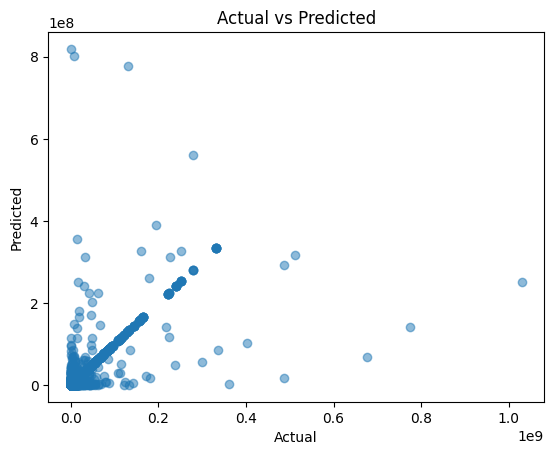

In [119]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [120]:
feature_importance = dict(zip(feature_names, model.feature_importances_))
for feature, importance in sorted(feature_importance.items(), key=lambda x: x[1], reverse=True):
    print(f"{importance:.5f} \u2014 {feature}")

0.39277 — Dochody_z_majatku
0.09099 — Ludnosc_mezczyzni_w_wieku_produkcyjnym_mobilnym
0.06227 — Wynagrodzenie_w_relacji_do_sredniej
0.05967 — Ludnosc_w_wieku_produkcyjnym_niemobilnym
0.04757 — Wynagrodzenie_ogolem
0.02963 — Dochody_podatek_od_nieruchomosci
0.02897 — Dochody_podatek_rolny
0.02743 — Udzialy_w_podatkach_dochodowych_razem
0.02328 — Dochody_z_uslug
0.02201 — Wplywy_z_oplaty_skarbowej
0.02172 — Wplywy_z_oplaty_targowej
0.02024 — Dochody_z_najmu_i_dzierzawy
0.02010 — Udzialy_w_podatkach_dochodowych_od_osob_fizycznych
0.01977 — Wplywy_z_oplaty_eksploatacyjnej
0.01961 — Ludnosc_kobiety_w_wieku_produkcyjnym_niemobilnym
0.01413 — Ludnosc_mezczyzni_w_wieku_przedprodukcyjnym
0.01349 — Dochody_podatek_od_dzialalnosci_gospodarczej
0.01158 — Wojewodztwo_Lubelskie
0.00762 — Dochody_podatek_od_srodkow_transportowych
0.00673 — Dochody_dofinansowanie_inwestycyjne
0.00610 — Wplywy_z_innych_lokalnych_oplat
0.00588 — Dochody_podatek_lesny
0.00567 — Dochody_podatek_PCC
0.00555 — Udzialy_w_pod